
# Predicting the Price of Used Cars
On Car Dekho Dataset

In this Project, we are going to predict the Price of Used Cars using various features like Present_Price, Selling_Price, Kms_Driven, Fuel_Type, Year etc. The data used in this project was downloaded from Kaggle.

**To be able to predict used cars market value can help both buyers and sellers.**

**Problem Statement**<br><br>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.
<br><br>
**Business Goal**<br><br>
we are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, themodel will be a good way for management to understand the pricing dynamics of a new market.

### Importing Libraries

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

### Loading the raw data

In [209]:
import pandas as pd 
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Preprocessing
**Exploring the descriptive statistics of the variables**

In [210]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corolla,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [211]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers as the values are gradually increasing!
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,184.600000,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000
95%,194.800000,3.000000,110.000000,196.360000,70.460000,57.500000,3503.000000,201.200000,3.780000,3.640000,21.820000,180.800000,5980.000000,37.000000,42.800000,32472.400000
99%,202.960000,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


In [212]:

# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

 Check for any missing value in data set and treat it

In [213]:
# checking missing value
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Data handling
Let us now proceed further and carry out some exploratory data analysis on our dataset to **understand our data better**. We will mainly focus on following things:

* Data Type Correction
* Splitting the column CarName into 2 columns-make & car_model
* Handling mistakes in data entry

In [214]:
#make a copy of the original one
car=df.copy()

In [215]:
#Data Type Correction
car['carbody'] = car['carbody'].astype(object)
car['symboling'] = car['symboling'].astype(object)

In [216]:
# Splitting the column CarName into 2 columns-make & car_model
# Handling the delimiters
car[['make','car_model']] = car["CarName"].str.split(" ", 1, expand=True)

# Removing the CarName ,'and car_model colum  
car = car.drop(['CarName','car_model'],axis =1)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [217]:
#Handling misspelled data
car.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**In the column make,We can observe following discrepancies:**

* mazda car has been misspelled as maxda at many places
* porsche has been misspelled as porcshce
* toyota car has been mentioned as toyouta
* Nissan has been referred as nissan in some cases
* Volkswagen car has been misspelled as vokswagen and vw

In [218]:
car['make'] = car['make'].replace({"maxda": "mazda","porcshce": "porsche","toyouta": "toyota",
                                   "nissan": "Nissan","vokswagen": "volkswagen","vw": "volkswagen"})
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Data Visualisation

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

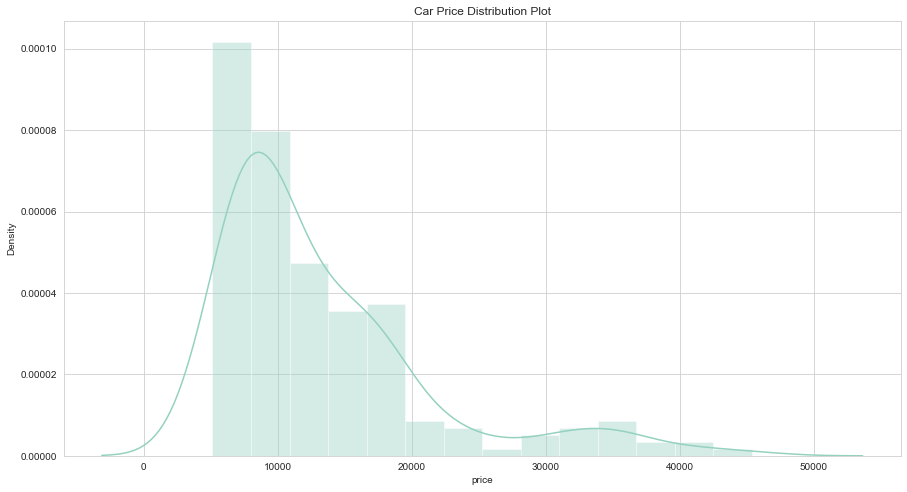

In [150]:
#Visualising dependent Variable - Target variable
plt.figure(figsize=(15,8))

# plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')

# sns.distplot(car.price, rug=True, color="y")
sns.distplot(car.price)

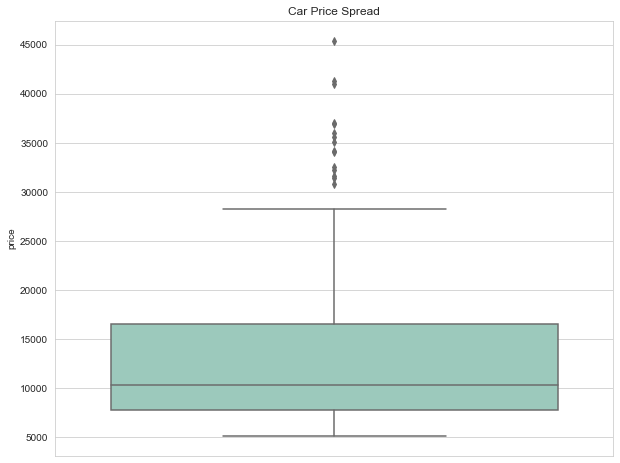

In [151]:
plt.figure(figsize=(10,8))
plt.title('Car Price Spread')
sns.boxplot(y=car.price)

plt.show()

In [152]:
car['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


**From the above plots and description we infer following things:**

* The density curve is right-skewed, which indicates that most of the prices are low.
* From the boxplot it is evident that there is is a significant difference between the mean and the median of the price distribution.
*The extreme values lying above the whiskers in the boxplot indicate outliers but since our dataset is small, we choose not to deal with outliers.
* The significant difference between between the 75th percentile and maximum price value also indicates outliers.

Visualising predictor Variables - Categorical variable

In [153]:
# Segregating data according to datatypes
car_obj = car.select_dtypes(include = 'object')
car_obj.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,make
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [154]:
car_obj.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'make'],
      dtype='object')

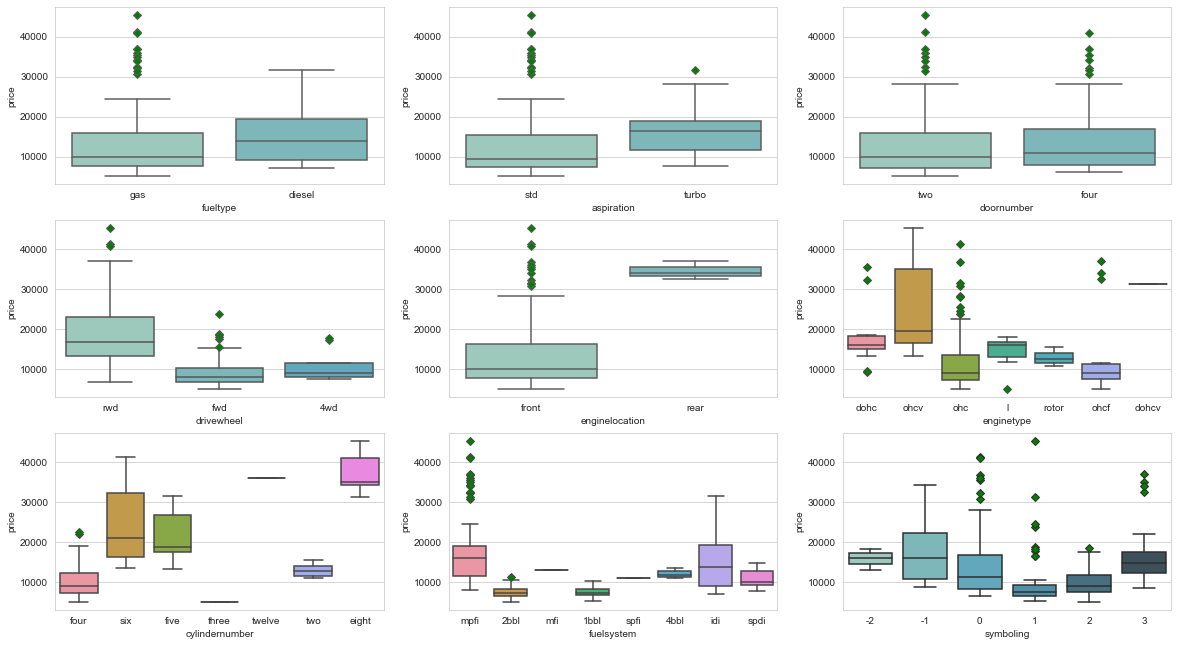

In [155]:
plt.figure(figsize =(20,15))
green_diamond = dict(markerfacecolor='g', marker='D')

plt.subplot(4,3, 1)
sns.boxplot(y='price', x='fueltype', data= car, flierprops=green_diamond)

plt.subplot(4,3, 2)
sns.boxplot(y='price', x='aspiration', data= car, flierprops=green_diamond)

plt.subplot(4,3, 3)
sns.boxplot(y='price', x='doornumber', data= car, flierprops=green_diamond)

plt.subplot(4,3, 4)
sns.boxplot(y='price', x='drivewheel', data= car, flierprops=green_diamond)

plt.subplot(4,3, 5)
sns.boxplot(y='price', x='enginelocation', data= car, flierprops=green_diamond)

plt.subplot(4,3, 6)
sns.boxplot(y='price', x='enginetype', data= car, flierprops=green_diamond)

plt.subplot(4,3, 7)
sns.boxplot(y='price', x='cylindernumber', data= car, flierprops=green_diamond)

plt.subplot(4,3, 8)
sns.boxplot(y='price', x='fuelsystem', data= car, flierprops=green_diamond)

plt.subplot(4,3, 9)
sns.boxplot(y='price', x='symboling', data= car, flierprops=green_diamond)

plt.show()

**INFERENCES:**

**a.) Symboling**

* This ordinal categorical column indicates assigned insurance risk rating. It has values ranging from -2 to 3. These values indicate assigned insurance risk rating, '-2' being high risk and '3' being pretty safe.
* cars with risk rating -1 are more expensive
* Cars with insurance risk rating 1 are the cheapest.

**b.) Fueltype** - Cars with fueltype DIESEL are more expensive

**c.) Aspiration** - Cars with Turbo aspiration are more expensive

**d.) Doornumber**

* Although Cras with four numbner of doors are more expensive than the ones with 2 number of doors only, there is no significant difference in the price
* Thus this variable does not affect the price much.<br>


**e.) Drivewheel** - Cars with rwd are more expensive than fwd cars

**f.) Enginelocation**

* There is significant difference in pricing of cars whose engine is located in rear and front.
* Cars whose engine is located in the rear are much more expensive than the other cars.

**g.) Engine type** - Cars with engine type ohcv are more expensive than the other types of cars.

**h.) Cylinder number** - Cras with eight cylinders are very expensive as compared to other cars.

**i.) Fuelsystem** - Cars with idior mpfi fuelsystem are more expensive as compared to others.

<Figure size 1080x720 with 0 Axes>

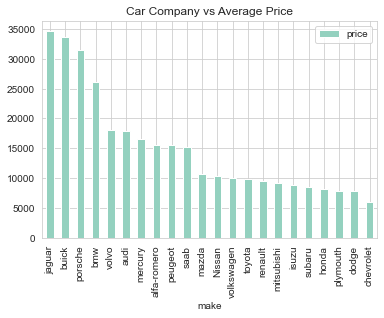

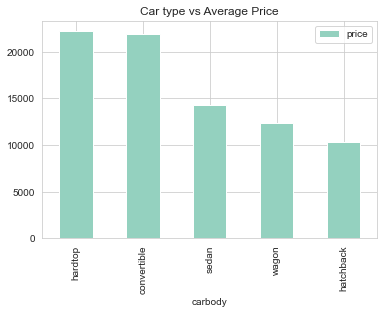

In [156]:

## Let us also observe how brand name and car body affect price

make_gp = car.pivot_table(values = 'price', index = 'make',aggfunc ='mean').sort_values(by ='price', ascending = False)
body_gp = car.pivot_table(values = 'price', index = 'carbody',aggfunc ='mean').sort_values(by ='price', ascending = False)


plt.figure(figsize=(15,10))

make_gp.plot.bar()
plt.title('Car Company vs Average Price')

body_gp.plot.bar()
plt.title('Car type vs Average Price')

plt.show()

**INFERENCES:**

* Cars of the company jaguar are among the most expensive cars. Cars of buick are also significantly more expensive than the cars by other companies.
* Cars of the type hardtop and convertible are more pricey than other types of cars.

**SUMMARY:** <br>
From the above plots and inferences, we can summarize that following categorical predictor variables affect the target variable:

1. symboling with -1 rating
2. fueltype - diesel
3. aspiration - turbo
4. drivewheel - rwd
5. carbody - convertible & hardtop
6. make - jaguar & buick
7. fuelsystem - mpfi & idi
8. cylindernumber - eight
9. enginetype - ohcv
10. enginelocation - rear

Visualising predictor Variables - Numerical variable

In [157]:
# Segregating data according to datatype
car_num = car.select_dtypes(exclude = 'object')
car_num.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [158]:
# Removing unnecessary column
car_num= car_num.drop('car_ID',axis=1)

In [159]:
# Observing the correlation among these numerical predictor variables
car_num.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


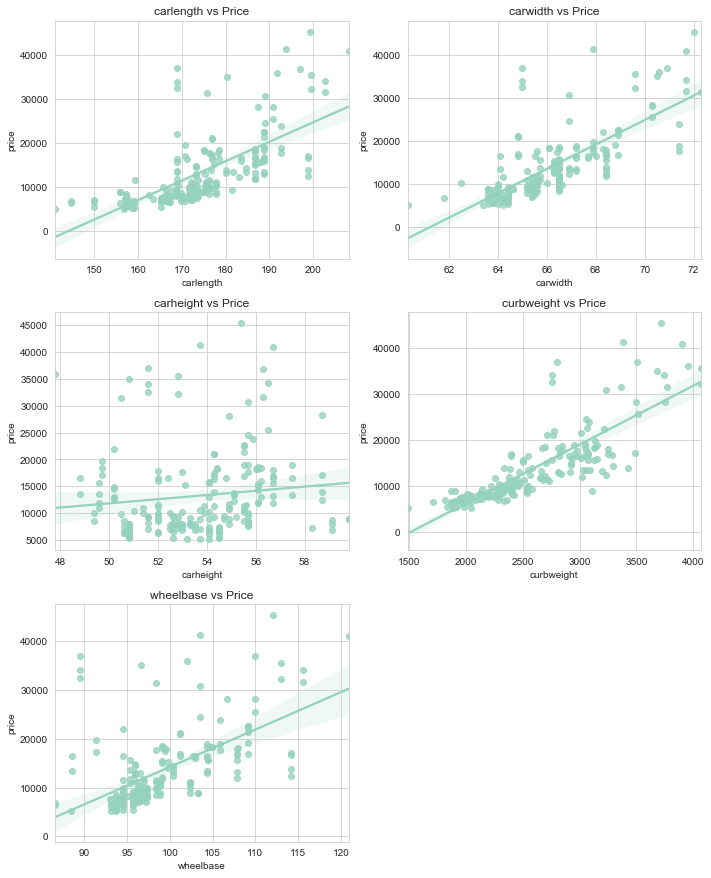

In [160]:
def regplot(x,fig):
    plt.subplot(5,2,fig)
    sns.regplot(car[x],car['price'])
    plt.title(x +' '+'vs Price')
    plt.ylabel('price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

regplot('carlength', 1)
regplot('carwidth', 2)
regplot('carheight', 3)
regplot('curbweight', 4)
regplot('wheelbase', 5)

plt.tight_layout()

**OBSERVATIONS:**

1. We observe that carwidth, curbweight and wheel base have high positive correlation with the target variable -price.
2. From the above scatter plots we see that there are many outliers in our dataset. Since our dataset is small, we choose not to deal with them.

In [161]:

# Let us observe the correlation among these variables
car_dim = ['carlength','carwidth','carheight','curbweight','wheelbase','price']
car[car_dim].corr()

,carlength,carwidth,carheight,curbweight,wheelbase,price
carlength,1.000000,0.841118,0.491029,0.877728,0.874587,0.682920
carwidth,0.841118,1.000000,0.279210,0.867032,0.795144,0.759325
carheight,0.491029,0.279210,1.000000,0.295572,0.589435,0.119336
curbweight,0.877728,0.867032,0.295572,1.000000,0.776386,0.835305
wheelbase,0.874587,0.795144,0.589435,0.776386,1.000000,0.577816
price,0.682920,0.759325,0.119336,0.835305,0.577816,1.000000


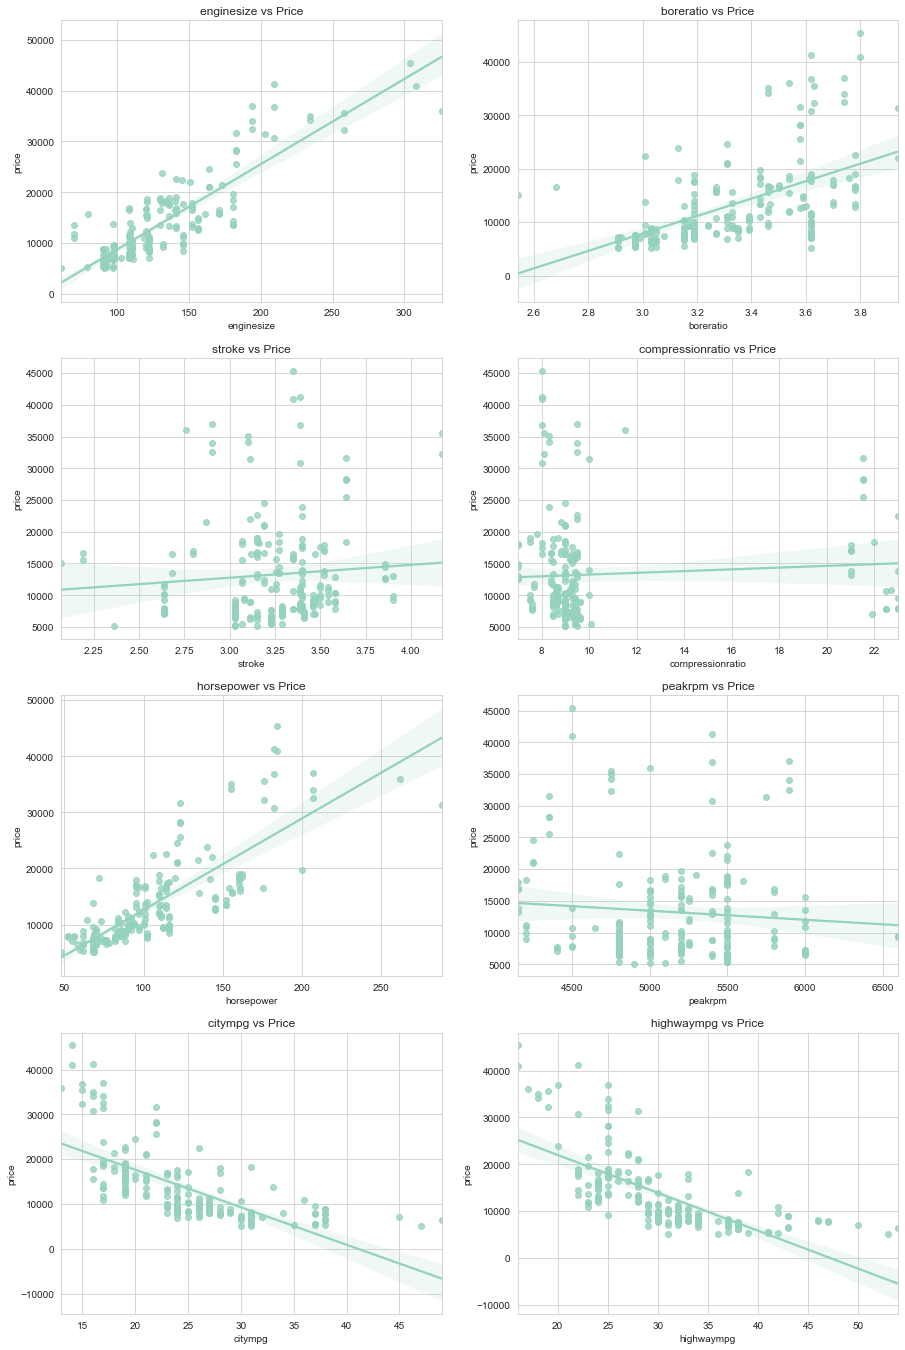

In [162]:
# Other features of the car
plt.figure(figsize=(15,30))

regplot('enginesize',1)
regplot('boreratio',2)
regplot('stroke',3)
regplot('compressionratio',4)
regplot('horsepower',5)
regplot('peakrpm',6)
regplot('citympg',7)
regplot('highwaympg',8)

**OBSERVATIONS:**

1. We observe that enginesize and horsepower have high positive correlation with the target variable -price.
2. We observe that citympg and highwaympg have high negative correlation with the target variable -price.
3. From the above scatter plots we see that there are many outliers in our dataset. Since our dataset is small, we choose not to deal with them.

In [163]:
car_num.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


From the above percentiles, we observe that there are many outliers in our dataset. Since our dataset is small, we choose not to deal with them.

In [164]:
# Let us observe the correlation among these variables
car_features = ['enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
car[car_features].corr()

,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
enginesize,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
peakrpm,-0.244660,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.085267
citympg,-0.653658,-0.584532,-0.042145,0.324701,-0.801456,-0.113544,1.000000,0.971337,-0.685751
highwaympg,-0.677470,-0.587012,-0.043931,0.265201,-0.770544,-0.054275,0.971337,1.000000,-0.697599
price,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,1.000000


SUMMARY:

From the above regression plots and correlation matrix, we can observe that there are few features that impact the price of the car to a great extent:

* carlength
* carwidth
* curbweight
* enginesize
* horsepower
* citympg
* highwaympg
* boreratio
* wheelbase

Now let us observe the correlation between these important features within themselves as this affects the behaviour of the model.

<AxesSubplot:>

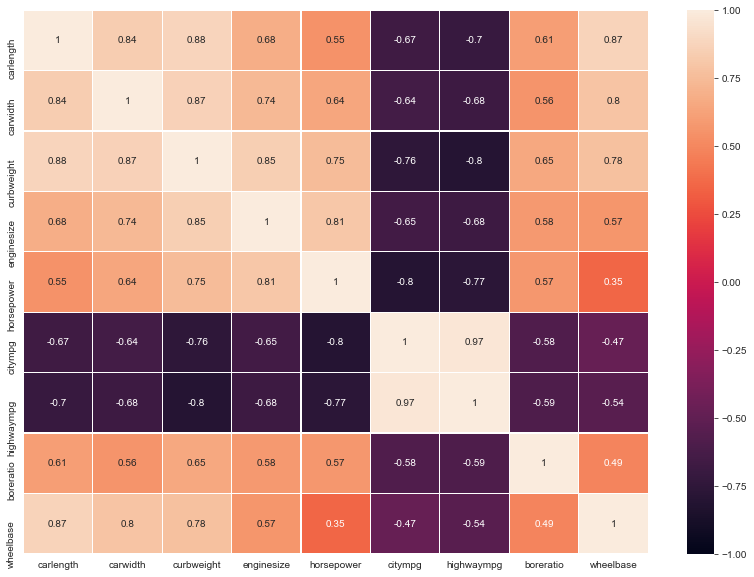

In [165]:
plt.figure(figsize = (14,10))

num_features = ['carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','boreratio','wheelbase']
sns.heatmap(car[num_features].corr(), annot = True, robust=True,linewidth=0.1, vmin=-1)


### Feature Selection for model building
From the above plots and summary, let us select few important features that affect price(target variable) to a great extent. This manual feature selection in the intial stages helps in bulding a good model.

In [166]:
car_lm = car[['symboling','fueltype','aspiration','drivewheel','carbody','cylindernumber',
                'enginetype','enginelocation','carlength','carwidth','curbweight','enginesize','horsepower','citympg',
                'highwaympg','boreratio','wheelbase','make','price']]
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,boreratio,wheelbase,make,price
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,13495.0
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,16500.0
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,19,26,2.68,94.5,alfa-romero,16500.0
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,24,30,3.19,99.8,audi,13950.0
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,18,22,3.19,99.4,audi,17450.0


In [167]:
car_lm.shape

(205, 19)

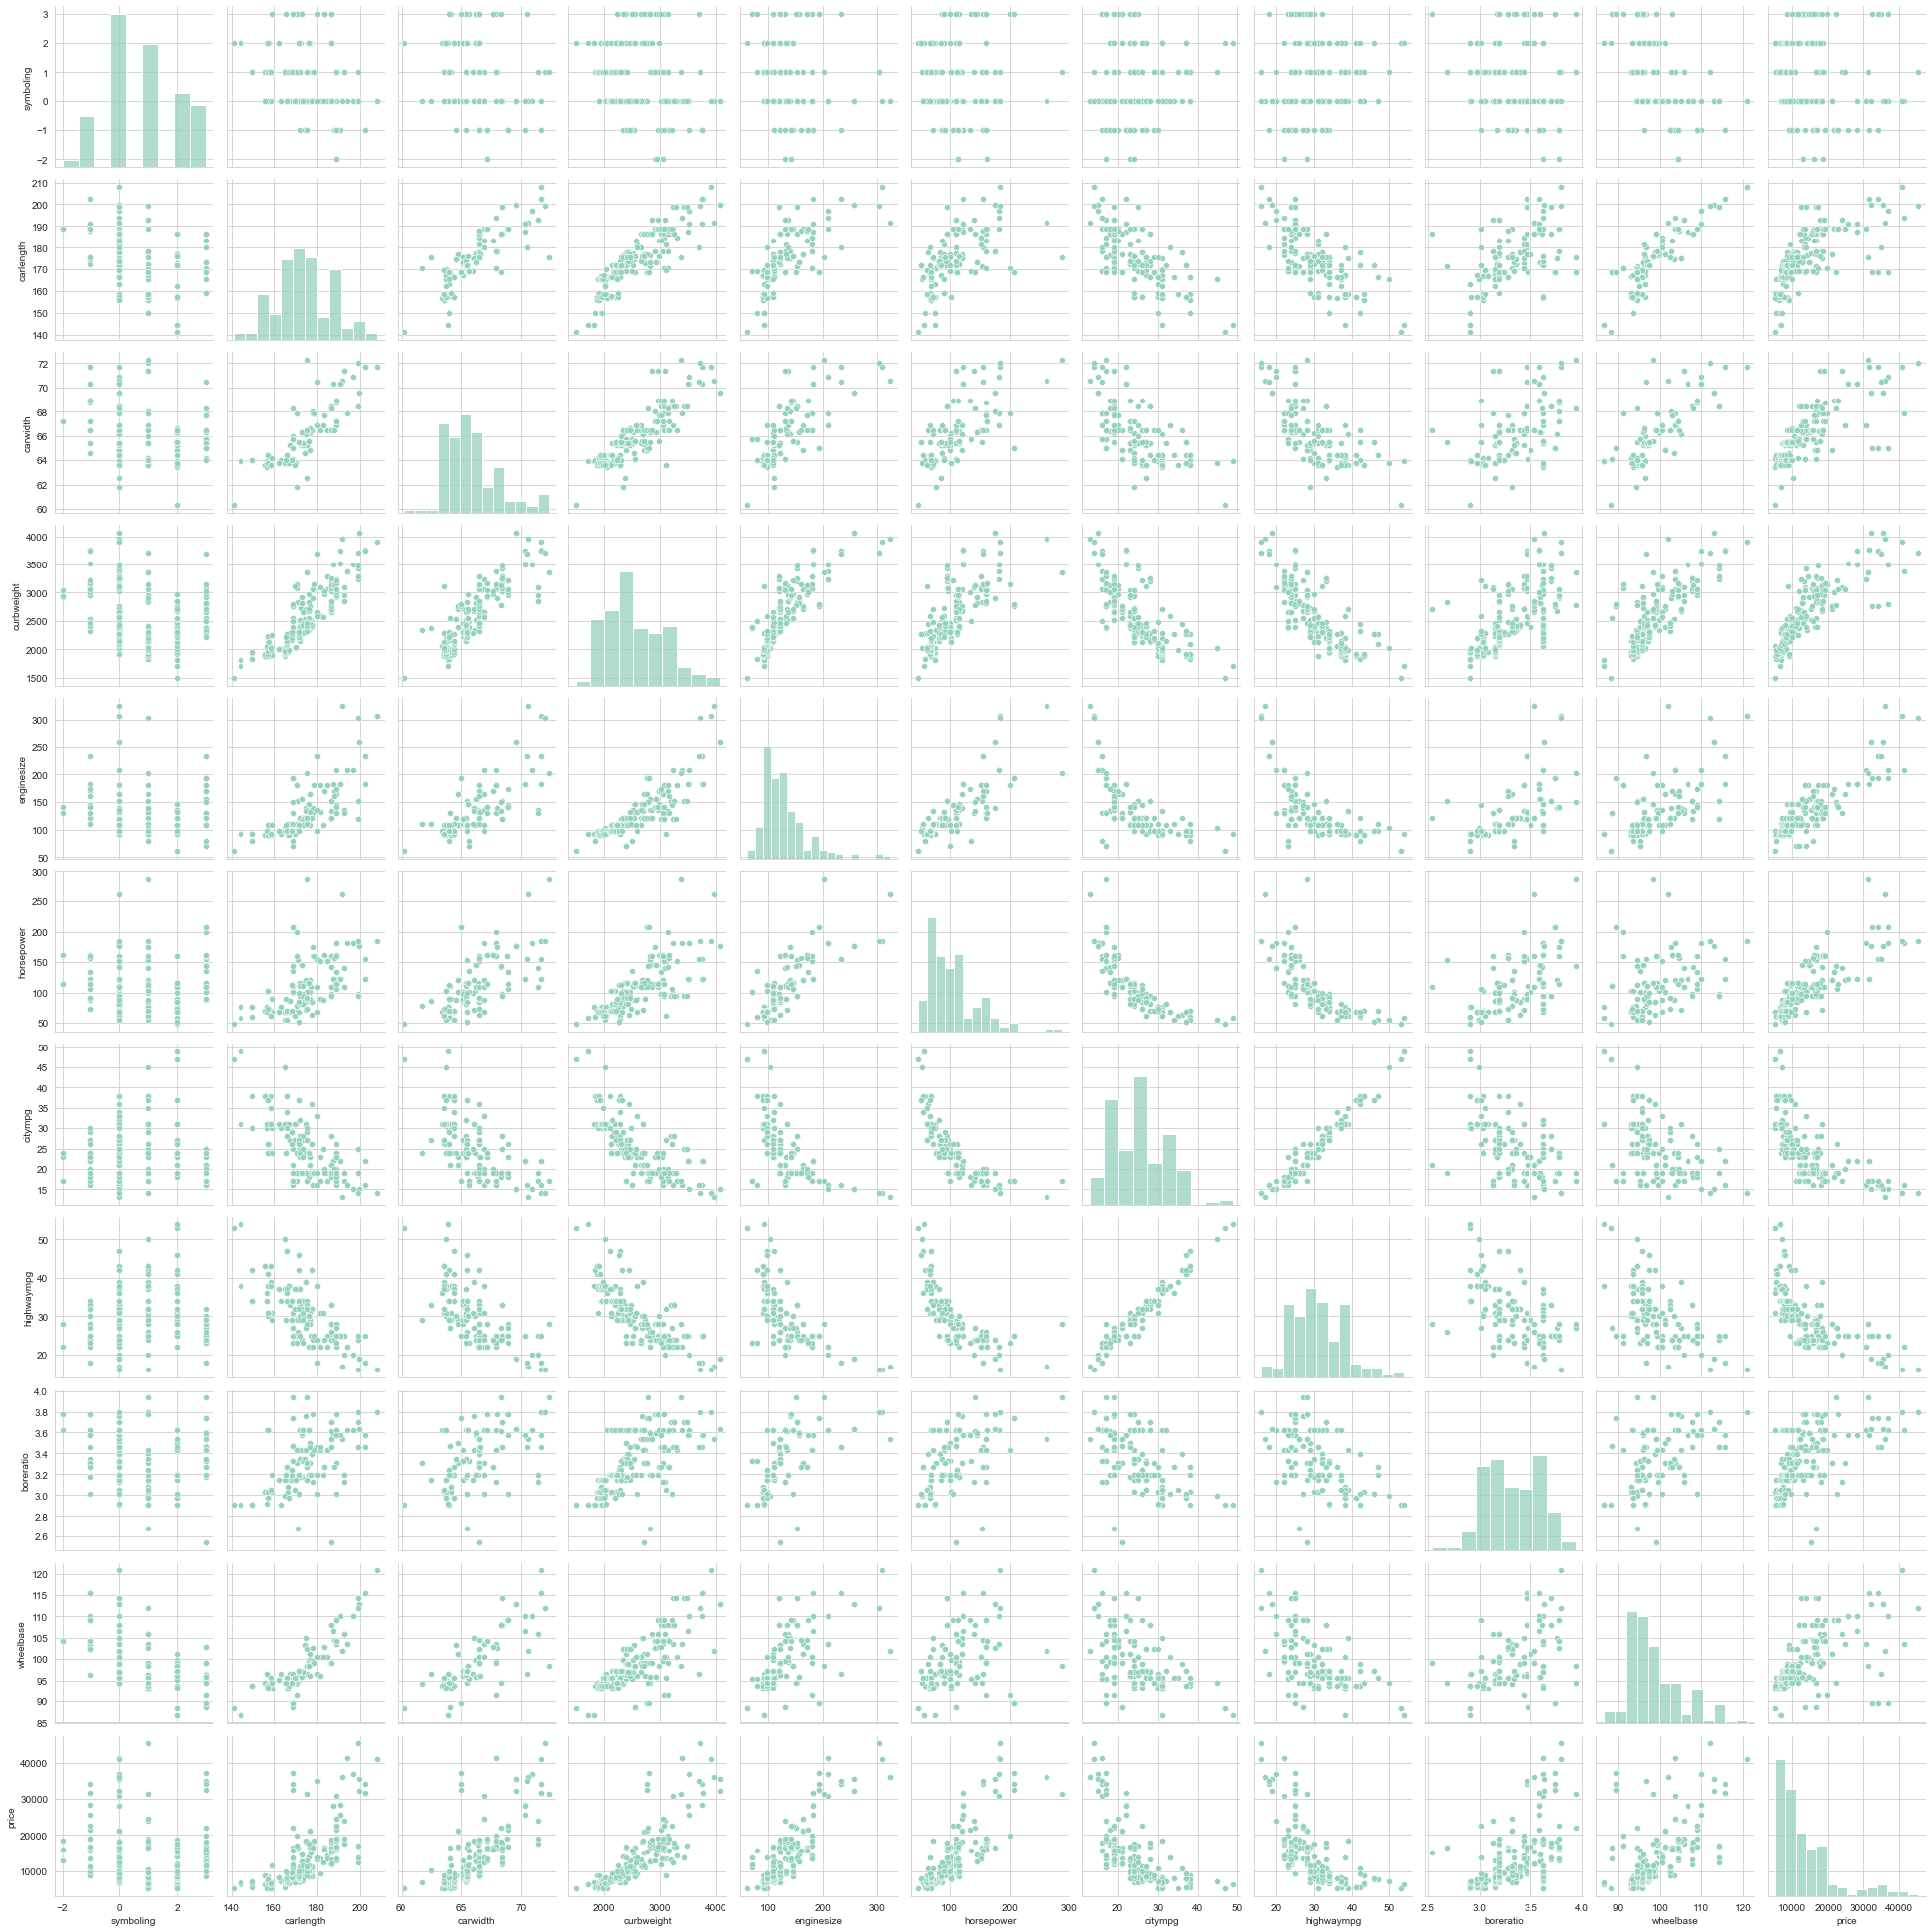

In [168]:

# Let us observe correlation among these selected features
sns.pairplot(car_lm)
plt.show()

###  Data preparation
Let us now transform our data in such a way that our model is able to capture all the important aspects of car that affect the target variable. We will carry out following steps:

1. Deriving new metrics
2. Ordinal categorical variables
3. Creating dummy variables

a.) Deriving new metrics

From the business driven insight we know that mileage of any car is a governing factor for determing the price of a car. Since mileage is directly proportional to the fuel consumption of the car, it becomes important that we consider it for building the model to predict the car prices. City mileage and highway mileage are two important factors that affect price. But since these are correlated to each other and with many other predictor variables, considering them makes the model unstable. Let us derive a new metric called Fuel Economy that describes both of these variables.

We know that Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%. Therefore,

Fuel economy = 0.45 x highway mileage + 0.55 x city mileage

In [169]:
car_lm['fuel_economy'] = (0.45 * car_lm['highwaympg']) + (0.55 * car_lm['citympg'])

# dropping citympg and highwaympg from the dataset
car_lm = car_lm.drop(['citympg','highwaympg'],axis=1)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,make,price,fuel_economy
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero,13495.0,23.70
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero,16500.0,23.70
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,alfa-romero,16500.0,22.15
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,audi,13950.0,26.70
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,audi,17450.0,19.80


From the visualisation of categorical variables, we observe that car company is also the governing factor for predicting the price of the car. Luxury cars seem more expensive

In [170]:
make_gp = car.pivot_table(values = 'price', index = 'make',aggfunc ='mean').sort_values(by ='price', ascending = False)
make_gp['price-1'] = make_gp['price']
make_gp = make_gp.drop('price',axis=1)
make_gp

,price-1
make,
jaguar,34600.000000
buick,33647.000000
porsche,31400.500000
bmw,26118.750000
volvo,18063.181818
audi,17859.166714
mercury,16503.000000
alfa-romero,15498.333333
peugeot,15489.090909


In [171]:
make_gp = car_lm.merge(make_gp.reset_index(), how='left',on='make')

bins = np.linspace(min(make_gp['price-1']), max(make_gp['price-1']),4)

bin_name=['Economic','Medium','Luxury']

car_lm['class'] = pd.cut(make_gp['price-1'], bins, right=False, labels = bin_name, include_lowest = True)

# converting datatype of class to object
car_lm['class'] = car_lm['class'].astype(object)

#dropping the column make from the dataset
car_lm = car_lm.drop('make',axis =1)

car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium



b.) Ordinal categorical variables

We observe that the column symboling has values ranging from -3 to 3. These values indicate assigned insurance risk rating, '-3' being high risk and '3 being pretty safe. Let us scale of the ratings. Let us denote-3 i.e. high risk as 0,-2 i.e. medium risk as 1 and so on. Thus, now our symboling column is in the range 0 to 6 where 0 denotes high risk and 6 denotes pretty safe.

In [172]:
rating_dict = {-3: 0,-2:1 ,-1: 2, 0: 3,1: 4,2: 5,3: 6}

car_lm['symboling'] = car_lm['symboling'].map(rating_dict)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,4,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,5,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium
4,5,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium


c.) Creating Dummy Variables

Let us create dummy variables for categorical columns to see which feature has significant influence on price.



In [173]:
dum = car_lm.select_dtypes(include = 'object')
dummy = pd.get_dummies(dum, prefix=["fuel","aspiration","drive","body","cylindernum","engine",
                                         "engineloc" ,'class'], drop_first = True)
dummy.head()

,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [174]:
dummy.shape

(205, 23)


We create 23 new dummy columns describingrespective categorical columns.

In [175]:

# Add the results to the original car dataframe

car_lm = pd.concat([car_lm, dummy], axis = 1)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,4,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,...,0,0,0,0,0,1,0,0,0,0
3,5,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,...,0,0,0,1,0,0,0,0,0,1
4,5,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,...,0,0,0,1,0,0,0,0,0,1


In [176]:

# drop duplicate columns
del_list = dum.columns
car_lm = car_lm.drop(del_list, axis = 1)
car_lm.head()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,...,0,0,0,0,0,0,0,0,0,0
1,6,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,...,0,0,0,0,0,0,0,0,0,0
2,4,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,...,0,0,0,0,0,1,0,0,0,0
3,5,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,...,0,0,0,1,0,0,0,0,0,1
4,5,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,...,0,0,0,1,0,0,0,0,0,1


In [177]:
car_lm.shape
print("Our Final dataset has",car_lm.shape[0],'number of rows')
print("Our Final dataset has",car_lm.shape[1],'number of columns')

Our Final dataset has 205 number of rows
Our Final dataset has 33 number of columns


### Splitting the Data and feature scaling
Two important steps are followed in this part of model building:
1. The entire dataset is split in Training and test set(70-30).
2. Normalisation of numeric variables
3. Dividing the training datset into target and predictor variables.

**a.) Train-Test split data**

In [178]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_train, car_test = train_test_split(car_lm, train_size = 0.7, test_size = 0.3, random_state = 100)


**b.) Feature scaling- Minmax scaling (normalisation)**

In [179]:


from sklearn.preprocessing import MinMaxScaler
# Applying scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = ['symboling','carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
           'boreratio', 'wheelbase', 'price', 'fuel_economy']

scaler = MinMaxScaler()
car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

car_train.head()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
122,0.6,0.426016,0.291667,0.272692,0.139623,0.083333,0.230159,0.244828,0.068818,0.530864,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.452033,0.666667,0.500388,0.339623,0.395833,1.000000,0.272414,0.466890,0.213992,...,0,0,0,1,0,0,0,0,1,0
166,0.6,0.448780,0.308333,0.314973,0.139623,0.266667,0.444444,0.272414,0.122110,0.344307,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.450407,0.316667,0.411171,0.260377,0.262500,0.626984,0.068966,0.314446,0.244170,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0.775610,0.575000,0.647401,0.260377,0.475000,0.746032,0.610345,0.382131,0.122085,...,0,0,0,1,0,0,0,0,0,1


**c .) Dividing train set into X and Y sets for the model building**

In [180]:
y_train = car_train.pop('price')
X_train = car_train

### Building a linear regression model
We will be using Recursive feature elimination technique(RFE)

**a.) Adopting RFE technique to select the features**

In [181]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 11)                # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 12),
 ('carlength', False, 21),
 ('carwidth', False, 7),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('horsepower', True, 1),
 ('boreratio', False, 6),
 ('wheelbase', True, 1),
 ('fuel_economy', True, 1),
 ('fuel_gas', False, 19),
 ('aspiration_turbo', False, 20),
 ('drive_fwd', False, 16),
 ('drive_rwd', False, 17),
 ('body_hardtop', True, 1),
 ('body_hatchback', True, 1),
 ('body_sedan', False, 2),
 ('body_wagon', True, 1),
 ('cylindernum_five', False, 10),
 ('cylindernum_four', False, 8),
 ('cylindernum_six', False, 9),
 ('cylindernum_three', False, 5),
 ('cylindernum_twelve', False, 18),
 ('cylindernum_two', False, 4),
 ('engine_dohcv', False, 15),
 ('engine_l', False, 13),
 ('engine_ohc', False, 22),
 ('engine_ohcf', False, 11),
 ('engine_ohcv', False, 14),
 ('engine_rotor', True, 1),
 ('engineloc_rear', True, 1),
 ('class_Luxury', True, 1),
 ('class_Medium', False, 3)]

In [182]:
# List of columns selected by RFE technique
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'enginesize', 'horsepower', 'wheelbase', 'fuel_economy',
       'body_hardtop', 'body_hatchback', 'body_wagon', 'engine_rotor',
       'engineloc_rear', 'class_Luxury'],
      dtype='object')


**b.) Building model using statsmodel, for the detailed statistics**

### MODEL 1

In [183]:
# Creating X_test dataframe with RFE selected variables
X_train_1 = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_1)

lm_1 = sm.OLS(y_train,X_train_1).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     133.3
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.67e-65
Time:                        23:31:49   Log-Likelihood:                 195.78
No. Observations:                 143   AIC:                            -367.6
Df Residuals:                     131   BIC:                            -332.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1398      0.039     -3.

In [184]:

# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,59.87
1,enginesize,28.25
3,wheelbase,20.23
2,horsepower,14.42
4,fuel_economy,3.03
6,body_hatchback,2.10
9,engineloc_rear,1.70
5,body_hardtop,1.55
10,class_Luxury,1.51
7,body_wagon,1.50


curbweight has high VIF so it can be dropped

### MODEL 2

In [185]:

X_train_2 = X_train_1.drop(["curbweight"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_2 = sm.add_constant(X_train_2)

lm_2 = sm.OLS(y_train,X_train_2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.37e-63
Time:                        23:31:49   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -354.5
Df Residuals:                     132   BIC:                            -321.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0960      0.039     -2.

In [186]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,19.05
1,horsepower,12.54
2,wheelbase,8.06
3,fuel_economy,2.99
5,body_hatchback,2.10
8,engineloc_rear,1.70
4,body_hardtop,1.55
9,class_Luxury,1.51
7,engine_rotor,1.32
6,body_wagon,1.30


enginesize has high VIF so it can be dropped

### MODEL 3

In [187]:
X_train_3 = X_train_2.drop(["enginesize"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_3 = sm.add_constant(X_train_3)

lm_3 = sm.OLS(y_train,X_train_3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     108.8
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           6.82e-57
Time:                        23:31:50   Log-Likelihood:                 168.81
No. Observations:                 143   AIC:                            -317.6
Df Residuals:                     133   BIC:                            -288.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0906      0.044     -2.

In [188]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,wheelbase,5.80
0,horsepower,4.52
2,fuel_economy,2.93
4,body_hatchback,2.06
7,engineloc_rear,1.70
3,body_hardtop,1.55
8,class_Luxury,1.46
5,body_wagon,1.27
6,engine_rotor,1.13


In [189]:
# Let us check correlation between the features to decide which has highest multicollinearity
X.corr()

,horsepower,wheelbase,fuel_economy,body_hardtop,body_hatchback,body_wagon,engine_rotor,engineloc_rear,class_Luxury
horsepower,1.000000,0.382758,-0.771285,0.103970,-0.035389,-0.063235,0.029774,0.221431,0.421633
wheelbase,0.382758,1.000000,-0.510040,-0.103235,-0.371606,0.162160,-0.092032,-0.127454,0.283107
fuel_economy,-0.771285,-0.510040,1.000000,-0.018609,0.144117,-0.081784,-0.208336,-0.090173,-0.309403
body_hardtop,0.103970,-0.103235,-0.018609,1.000000,-0.105689,-0.057301,-0.024832,0.573270,0.115968
body_hatchback,-0.035389,-0.371606,0.144117,-0.105689,1.000000,-0.282618,0.234957,-0.060588,-0.138688
body_wagon,-0.063235,0.162160,-0.081784,-0.057301,-0.282618,1.000000,-0.066403,-0.032849,-0.059629
engine_rotor,0.029774,-0.092032,-0.208336,-0.024832,0.234957,-0.066403,1.000000,-0.014236,-0.055885
engineloc_rear,0.221431,-0.127454,-0.090173,0.573270,-0.060588,-0.032849,-0.014236,1.000000,0.254734
class_Luxury,0.421633,0.283107,-0.309403,0.115968,-0.138688,-0.059629,-0.055885,0.254734,1.000000


fuel_economy seems to have correlation with other features.Dropping this will improve the VIF of the model.

### MODEL 4

In [190]:
X_train_4 = X_train_3.drop(["fuel_economy"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_4 = sm.add_constant(X_train_4)

lm_4 = sm.OLS(y_train,X_train_4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     123.2
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           6.40e-58
Time:                        23:31:50   Log-Likelihood:                 168.73
No. Observations:                 143   AIC:                            -319.5
Df Residuals:                     134   BIC:                            -292.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0751      0.019     -4.

In [191]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [192]:
vif

,Features,VIF
0,horsepower,4.11
1,wheelbase,3.81
6,engineloc_rear,1.69
2,body_hardtop,1.52
3,body_hatchback,1.44
7,class_Luxury,1.44
4,body_wagon,1.25
5,engine_rotor,1.09


body_hardtop has high p-value; can be dropped
and 
engine_rotor has high p-value; can be dropped

### MODEL 

In [193]:
X_train_5 = X_train_4.drop(["body_hardtop"], axis = 1)
X_train_6 = X_train_5.drop(["engine_rotor"], axis = 1)
X_train_7 = X_train_6.drop(["engineloc_rear"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_7 = sm.add_constant(X_train_7)

lm_7 = sm.OLS(y_train,X_train_7).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     191.0
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           6.44e-60
Time:                        23:31:50   Log-Likelihood:                 165.35
No. Observations:                 143   AIC:                            -318.7
Df Residuals:                     137   BIC:                            -300.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0715      0.019     -3.

In [194]:

# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_7.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,3.81
1,wheelbase,3.53
4,class_Luxury,1.38
2,body_hatchback,1.35
3,body_wagon,1.25



**None of the VIF's are above 5 and from the summary we can see that none of them have significant p-value (> 0.05). So we can conclude that this is our final model.**

### Residual Analysis of the train data
**a.) Normal Distribution of error terms**

To check if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [195]:
y_train_pred = lm_7.predict(X_train_7)

Text(0.5, 0, 'Errors')

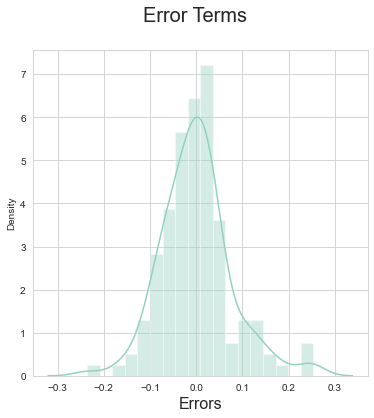

In [196]:
# plot the histogram of the error terms
fig = plt.figure(figsize=(6,6))
sns.distplot((y_train - y_train_pred), bins = 18)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 16)


**b.) Tests for Heteroscedasticity**

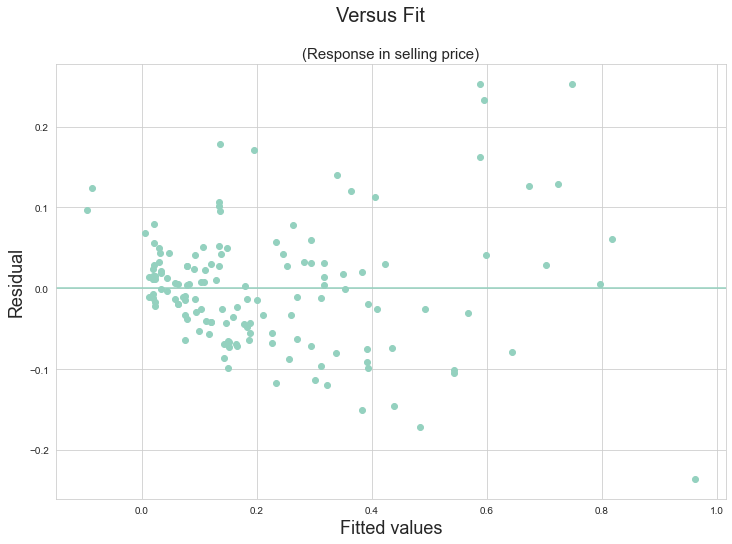

In [197]:

resid = lm_7.resid
fig = plt.figure(figsize = (12,8))
plt.scatter(y_train_pred, resid)
fig.suptitle('Versus Fit', fontsize = 20)  
plt.title('(Response in selling price)',  fontsize = 15)       
plt.xlabel('Fitted values', fontsize = 18)
plt.ylabel('Residual', fontsize = 18)           
plt.axhline(0, 0,8)
plt.show()

We observe that residuals are randomly distributed and there is no definite pattern observed. Thus basic assumption of linear regression for residual terms i.e homoscedasticity is satisfied.

### Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, let us now make predictions using our final model.

Applying the scaling on the test sets

In [198]:
num_vars = ['symboling','carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
           'boreratio', 'wheelbase', 'price', 'fuel_economy']

car_test[num_vars] = scaler.transform(car_test[num_vars])

In [199]:
car_test.describe()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000
mean,0.583871,0.559481,0.480376,0.428470,0.265673,0.248858,0.556580,0.437764,0.239439,0.344661,...,0.0,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.112903,0.129032
std,0.271724,0.189947,0.165440,0.179488,0.162820,0.163376,0.228484,0.212861,0.233076,0.175037,...,0.0,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.319058,0.337972
min,0.000000,0.056911,0.183333,0.128394,0.067925,0.016667,-0.111111,0.000000,0.007763,0.002743,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.400000,0.459350,0.358333,0.305275,0.177358,0.107292,0.404762,0.313793,0.092342,0.192387,...,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.600000,0.547967,0.441667,0.406129,0.226415,0.218750,0.563492,0.387931,0.158991,0.326475,...,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.800000,0.719919,0.516667,0.564876,0.316038,0.295833,0.746032,0.570690,0.317243,0.451303,...,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,1.089431,0.975000,0.935609,0.932075,0.662500,0.888889,1.182759,1.112855,0.747599,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


**Dividing into X_test and y_test**

In [200]:

y_test = car_test.pop('price')
X_test = car_test

In [201]:

col=X_train_7.columns[1:]
X_test_7 = X_test[col]

In [202]:
# Adding a constant variable 
import statsmodels.api as sm  
X_test_7 = sm.add_constant(X_test_7)

In [203]:
X_test_7.shape

(62, 6)

In [204]:
# making predictions usingthe final model
y_pred_7 = lm_7.predict(X_test_7)

In [205]:
# Evaluate the r2
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_train, y_pred = y_train_pred)
print('Coefficient of determination for train data: %.3f' % r2) 

r2 = r2_score(y_true = y_test, y_pred = y_pred_7)
print('Coefficient of determination for test data: %.3f' % r2)

Coefficient of determination for train data: 0.875
Coefficient of determination for test data: 0.882


**Since R2 for train set is 0.875 and R2 for test set is 0.882, we can say that what the model has learnt on the training set, it has been able to generalise very well on the test set as well.**

In [206]:
#RMSE mean for test dataset
import math
from sklearn.metrics import mean_squared_error
Rmse = math.sqrt(mean_squared_error(y_test, y_pred_7)) 
print('Root mean square error: %.3f' % Rmse)

Root mean square error: 0.079



The RMSE is analogous to the standard deviation and is a measure of how large your residuals are spread out. Since error is very low, we can say that our model is performing very well

### Model Evaluation
Let's now plot the graph for actual versus predicted values.

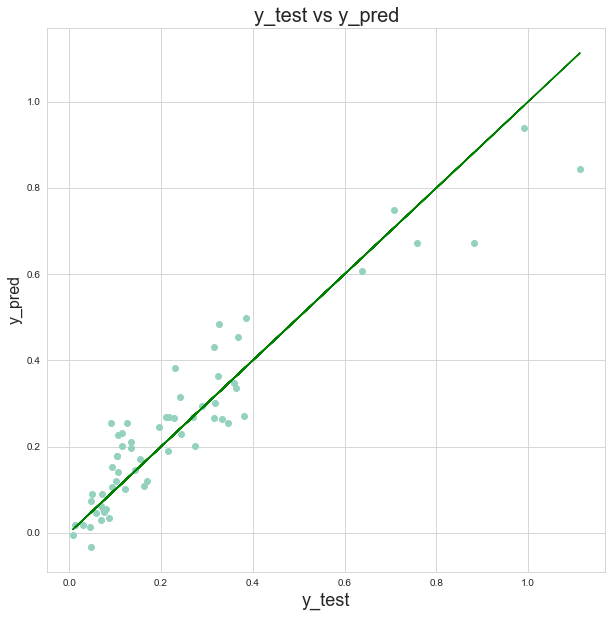

In [207]:

# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_7)
plt.title('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.plot(y_test, y_test, color="g")

It seems like the predicted values are really good. Actual scores and predicted scores have almost perfect linearity. WE might achieve a more better relation if we treat the outliers but since our dataset is small we choose not to deal with them as we might end up loosing vital information.

### Conclusions
Following are the conclusions based on the model we built.

1. R-sqaured and Adjusted R-squared (extent of fit) are 0.875 and 0.870 respectively - 87% variance explained.
2. F-stats and Prob(F-stats) (overall model fit) is 192.0 and 6.44e-60(approx. 0.0) respectively - Model fit is significant and explained 87% variance is just not by chance.
3. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. This indicates that all the predictors are statistically significant.

Thus, we say that themodel will be a good way for management to understand the pricing dynamics of a new market.

Following are the variables that are significant in predicting the price of a car:

* Horsepower
* wheelbase
* carbody (hatchback)
* carbody (wagon)
* Luxury cars (Cars that are very expensive or high-end)